         Date      Open      High       Low     Close  Adj Close     Volume
0  2010-01-04  7.622500  7.660714  7.585000  7.643214   6.478997  493729600
1  2010-01-05  7.664286  7.699643  7.616071  7.656429   6.490201  601904800
2  2010-01-06  7.656429  7.686786  7.526786  7.534643   6.386963  552160000
3  2010-01-07  7.562500  7.571429  7.466071  7.520714   6.375156  477131200
4  2010-01-08  7.510714  7.571429  7.466429  7.570714   6.417541  447610800


TypeError: float() argument must be a string or a real number, not 'method'

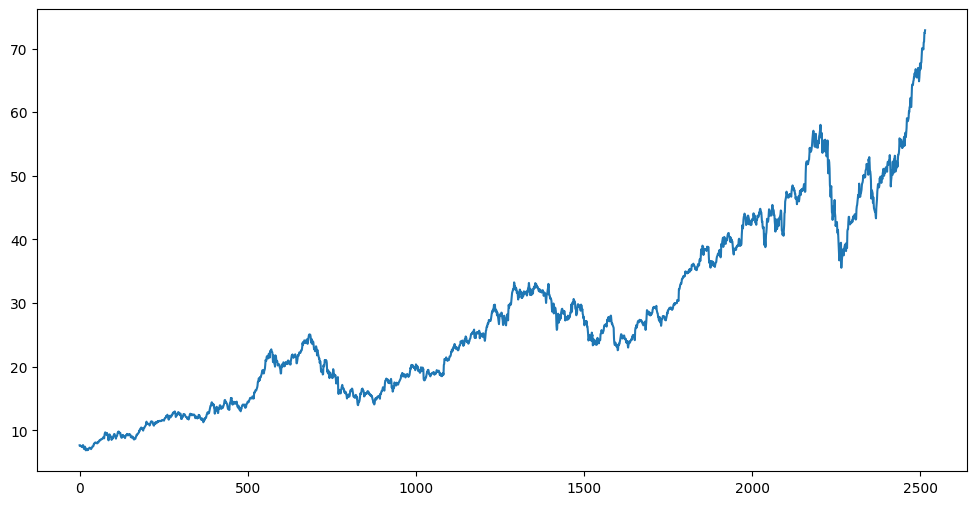

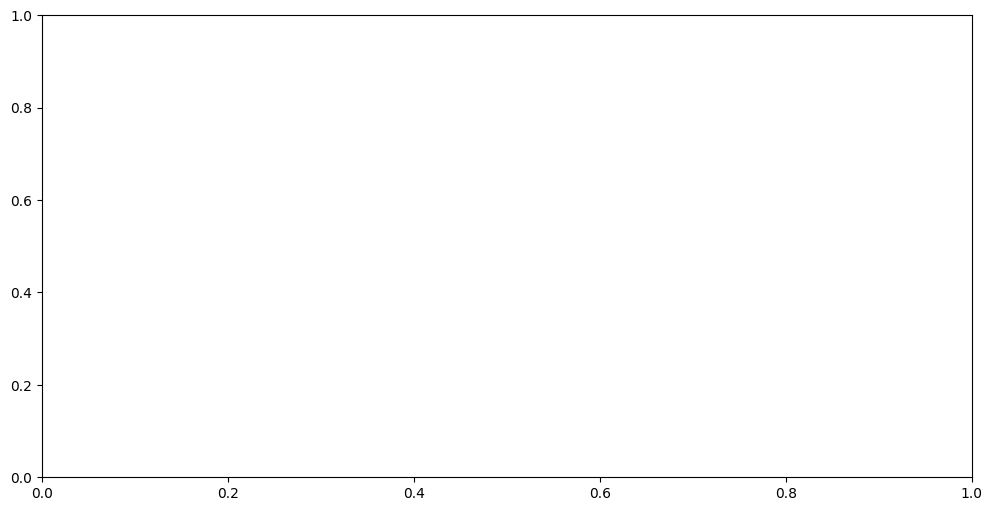

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from keras.models import load_model
import streamlit as st

st.title('Stockport Predictive Sentiment Analysis')
user_input = st.text_input('Enter Stock Ticker', 'AAPL')

file_path = 'AAPL.csv'
df = pd.read_csv(file_path)
print(df.head())

st.subheader('Data from 2010 - 2019')
st.write(df.describe())
st.subheader('Closing Price vs Time chart')
fig = plt.figure(figsize = (12,6))
plt.plot(df.Close)
st.pyplot(fig)

st.subheader('Closing Price vs Time chart with 100MA')
ma100 = df.Close.rolling(100).mean
fig = plt.figure(figsize = (12,6))
plt.plot(ma100)
plt.plot(df.Close)
st.pyplot(fig)

st.subheader('Closing Price vs Time chart with 100MA and 200MA')
ma100 = df.Close.rolling(100).mean
ma200 = df.Close.rolling(200).mean
fig = plt.figure(figsize = (12,6))
plt.plot(ma100)
plt.plot(ma200)
plt.plot(df.Close)
st.pyplot(fig)

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)

x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

model = load_model('keras_model.h5')
past_100_days = data_training.tail(100)
frames = [past_100_days, data_testing]
final_df = pd.concat(frames, ignore_index=True)
input_data = scaler.fit_transform(final_df)

x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
y_predicted = model.predict(x_test)
scaler = scaler.scale_

scale_factor = 1/scaler[0]
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

st.subheader('Prediction vs Original')
fig2 = plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
st.pyplot(fig2)
plt.show()